<div>
<img src="GMIT.PNG" width="550"/>
</div>

<h1> <center> Spectrograms, Applied to Birdsong </center> <h1>
<h2> <center> DSP Project Report </center> <h1>
<h2> <center> 4th Year </center> <h1>  
<h2> <center> Tony Leonard - G00372842 </center> <h1>
<h2> <center> 2021/2022 </center> <h1>
        

# Project Brief
Produce a Jupyter Notebook report on the topic of ‘Spectrograms, Applied to Birdsong’.
Research the topic, explain important concepts/algorithms/mathematics, implement and
evaluate your own examples, and demonstrate insight on the topic.
Please see also the accompanying grading rubric. Scheduled lectures and laboratories will
include an introduction to spectrograms and how to get started with Jupyter Notebook, as
well as further guidelines and resources on the project.

# Introduction
This project was assigned to our class by our DSP (Digital Signal Processing) lecturer for the project section of the module. The project is worth 30% of the total module and is based on converting birdsongs and calls to spectrograms. I decided I would collect my own recordings around Galway city and my hometown of Ballina. From there I converted my recordings to spectrograms and compared the birdsongs to one another. I give my conclusion at the end.

# Project Research and Birdsong Recordings
During the class in which this project was first introduced our lecturer went through the basics of using Jupyter Notebook and told us about an interesting website called Xeno-canto [1]. Xeno-canto is a website that shares short audio recordings of birdsongs from all over the world. While you are free to access any of the files in Xeno-canto, I decided I would rather collect my own recordings around the localities I reside in. I will go into further detail about the bird species I recorded later on in the project, but for now I will discuss the locations I recorded the birds. 

My first recording was actually from my bedroom window at around five AM in the morning as the birds outside were making a ruckus and woke me up. My family and I live out in the countryside, about three miles from the town of Ballina located in Co. Mayo. I traveled back home as I did not have to attend college during a reading week. Since I was here I thought I might as well record some audio of the birds around my local area.
My second recording contains more than one bird singing as I recorded it from a lush green area, located off the path near the waterfront of Lough Atalia, in Galway city.
My final recording was just outside the student accommodation I live in. It was recorded beside a small green area near the Huntsman Inn in Galway city and although the second and third recordings are right beside each other the birds recorded sound very different.

The device I did all of my recordings on is a One Plus 8T, using the pre-installed recording app that was on it when I purchased it. The app I used to identify what birds were making all the birdsongs and chirps is called Merlin [2]. Merlin is a app that can be downloaded on both Android and Apple devices and uses advanced AI technology to help you determine what bird/s you recorded.

## What is a birdsong?
The field of Ornithology collects, analyses, and categorizes birdsongs, chirps, and calls since the creation of it in the late 1600s. The main reason a bird uses it song is for territorial defense, mating or simply to communicate with other birds. The noises birds make are usually of a high frequency and are easy to distinguish from normal everyday sounds when you visualize them on a spectrogram.

The Google search dictionary describe a bird song as; "The musical vocalizations of a bird or birds, typically uttered by a male songbird in characteristic bursts or phrases for territorial purposes."[3]



## What is a spectrogram?
A spectrogram provides us with visual image for sounds or as Wikipedia describe it; "A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams."[4]

### How are the spectrograms generated?
The code that generates the spectrograms was given to us by the lecturer, prior to starting project. The code is written in Python and works off the Spyder IDE [5] which is a sub-application of the Anaconda Python suite.[6]

Below is the spectrogram Python script. At the top of the script there are some imported Python libraries. The numpy and scipy libraries are used to transform the specified wav file, while the matplotlib library generates the spectrogram. The wav file that is being used in the script is the "myself.wav"file which generates a green coloured spectrogram.

If we look to the comment that I have added the "# 1*" we can see spectrogram calculation. The first part of the calculation is the "audio" parameter which is in fact the "myself.wav" file. This is followed by the window type which in this case is a "hanning" type window. After this we see the "nperseg" parameter which dictates the length of each segment and the "noverlap" dictates the overlap between each of the segments. "detrend" is set to false and the "scaling" format is spectrum.

The comment marked with "# 2*" is the calculation for the magnitude of the spectrum in decibels. This calculation is used to show the visual difference of the decibels scaling for the decibel key below the spectrogram and for the spectrogram itself.

The "def plot_spec_scipy():" function is used to construct the spectrogram and give it all its labels and visual constraints. For this spectrogram I have decided to give it a green theme. All the other spectrograms in this report will have different colours.

They say a picture is worth a thousand words so below this, is a spectrogram of a recording of myself saying "Spectrograms, applied to birdsongs". Along the X axis you can clearly see the length of the recording which is around three seconds. Frequency is on the Y axis in kHz and it ranges between zero and eleven kHz. The Decibel range key is at the bottom of the image with the darker colours representing the louder sounds.


Audio length: 2.75 seconds


<ipython-input-1-a45a7adde29f>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Greens, linewidth=10)


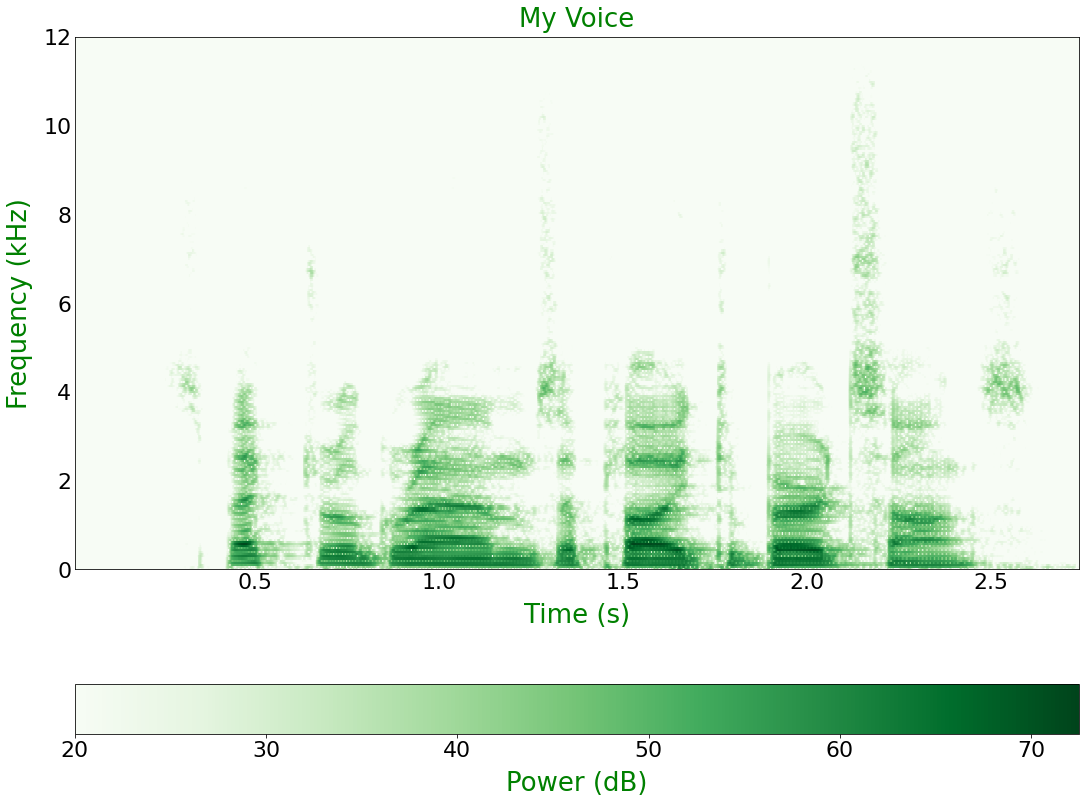

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

rate, audio = wavfile.read('myself.wav')

N = audio.shape[0]       
 # Length of audio track in seconds         
L = N / rate                  
print(f'Audio length: {L:.2f} seconds')

# 1* Spectrogram calculation using scipy
freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')
# 2* Calculate the magnitude of the spectrum in decibels
spec_db_sp = 10*np.log10(spec_sp)

def plot_spec_scipy():
    fig, ax = plt.subplots(figsize=(18,14))
    im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Greens, linewidth=10)
    cb = fig.colorbar(im, ax=ax, orientation="horizontal")
    ax.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10, color='green')
    ax.set_xlabel('Time (s)', fontsize=26, labelpad=10, color='green');
    ax.set_title('My Voice', fontsize=26, pad=10, color='green');
    ax.set_ylim(0, 12)
    ax.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb.set_label('Power (dB)', fontsize=26, labelpad=10, color='green')
    cb.ax.tick_params(labelsize=22)

plot_spec_scipy();
    

## What is a time-domain waveform?
A time-domain waveform shows how a signal changes with time. The Python function for the generation of the time-domain waveform is smaller than the spectrogram function. As mentioned above the matplotlib library is responsible for generating the spectrogram but this is also true for the time-domain waveform. The x-axis again displays the length of the .wav file and the y-axis displays the amplitude. 

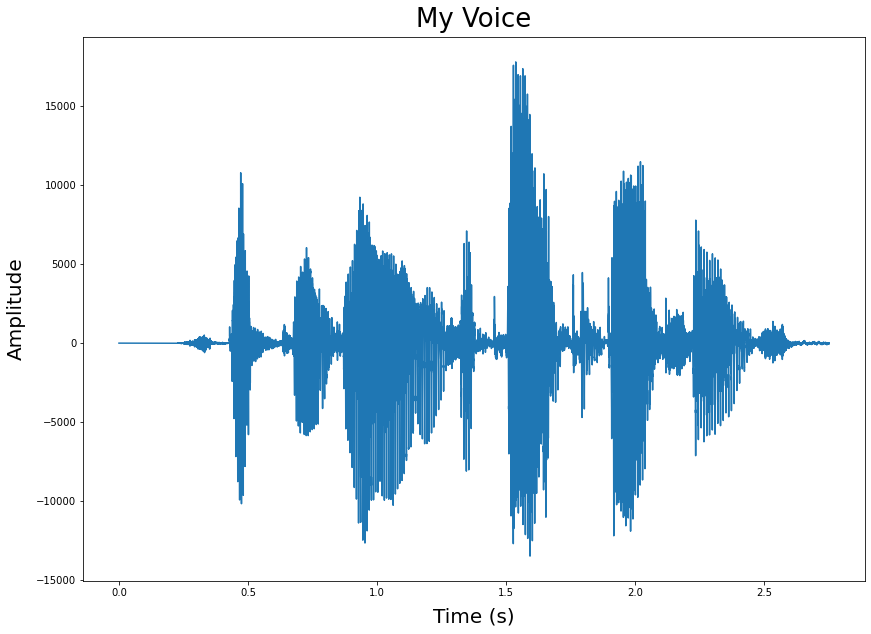

In [2]:
def plot_time_domain():
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111)
    ax.plot(np.arange(N) / rate, audio)
    ax.set_title('My Voice', fontsize=26, pad=10);
    ax.set_xlabel('Time (s)', fontsize=20, labelpad=10)
    ax.set_ylabel('Amplitude', fontsize=20, labelpad=10);
    
plot_time_domain();

## What is a Short-time Fourier transform?
As Wikipedia describes; "The Short-time Fourier transform (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time."[7]

The Fourier Transform existed well before Jean-Baptiste Fourier but it was he who determind that all signals could be represented as a combination of sinusoids.
There are more than one Fourier transform, but for this report we will only be looking at the Discrete Fourier Transform (DFT). The Short-time Fourier transform implement the DFTs over and over again in each window on the signal.


### What is a Discrete Fourier Transform (DFT)?
The DFT is a transform that is used to convert time data into frequency domain data. It maps signals from the time domain to the frequency domain. Some common applications for a Discrete Fourier Transform are image denoising, 4G cellular data transmission, MRI image analysis, sound filtering and of course audio spectrograms.

The equation we use with the Discrete Fourier Transforms is:

(I did a HTML math equation tutorial on Overleaf)[8]

$\displaystyle X[k] = \sum_{n=0}^{N-1} x[n]e^{-j\frac{2\pi}N kn}$

Where: 

$\displaystyle x[n]$ are the sample time-domain values. $\displaystyle n$ is the sample number $\displaystyle (0,1,2 ... N-1)$.

$\displaystyle N$ is the number of input and output samples to/from the DFT.
 
$\displaystyle X[k]$ measures the frquency content of the signal at $\displaystyle \omega _k =\frac{2\pi}N k$, for each, $\displaystyle k=0,1,2,...,N-1$.

 
 





# First Recording
As I mentioned before the first recording was recorded from the outskirts of my hometown of Ballina. I uploaded it to the Merlin sound ID analyser and it suggested two birds that are likely making the sounds in the recording.The birds in question are the House Sparrow and the Orchard Oriole. If any bird were to be recorded, it would have been a House Sparrow as they nest above my bedroom window every year around this time. To my surprise though the bird that was actually singing was the Orchard Oriole as the House Sparrow was only chirping. I found this out when I compared the birds in my recording against the bird recordings in the Merlin ID database. I have chosen the colour orange for this spectrogram as the underside of the Orchard Oriole is distinctly orange. For this spectrogram I have shortened the window and segment length to 500 as the House Sparrow's chirps were barely visible with the previous values. This decreases the frequency resolution but allows us to see the shorter calls a bird makes.

<div>
<audio controls src='recording1.wav'/>
</div>

Audio length: 43.59 seconds


<ipython-input-3-e141b0269758>:10: RuntimeWarning: divide by zero encountered in log10
  spec_db_sp = 10*np.log10(spec_sp)
<ipython-input-3-e141b0269758>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Oranges, linewidth=10)


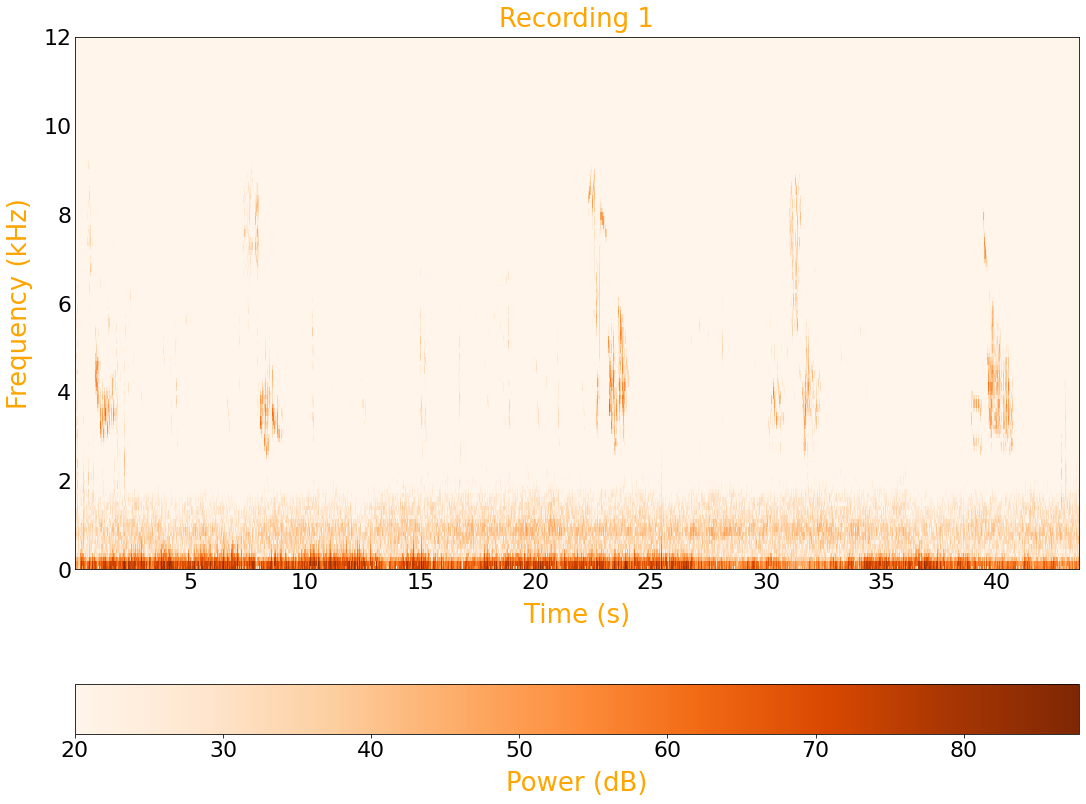

In [3]:
rate, audio = wavfile.read('recording1.wav')

N = audio.shape[0]            
L = N / rate                  
print(f'Audio length: {L:.2f} seconds')

freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window='hanning',
                                                 nperseg=500, noverlap=500-50,
                                                 detrend=False, scaling='spectrum')
spec_db_sp = 10*np.log10(spec_sp)

def plot_spec_scipy():
    fig, ax = plt.subplots(figsize=(18,14))
    im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Oranges, linewidth=10)
    cb = fig.colorbar(im, ax=ax, orientation="horizontal")
    ax.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10, color='orange')
    ax.set_xlabel('Time (s)', fontsize=26, labelpad=10, color='orange');
    ax.set_title('Recording 1', fontsize=26, pad=10, color='orange');
    ax.set_ylim(0, 12)
    ax.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb.set_label('Power (dB)', fontsize=26, labelpad=10, color='orange')
    cb.ax.tick_params(labelsize=22)

plot_spec_scipy();

The Orchard Oriole's birdsong can be clearly seen throughout the recording. The Oriole's song frequency ranges between 2kHz and 9.5kHz. If you look closely between the ten second and twenty second mark you can see the House Sparrow's chirping. The Sparrow's chirp frequency ranges between 3kHz and 7kHz and are quite low compared to the Oriole. My guess is that the Sparrow/s in question are quite young and may not have developed their song yet and their parents may be out looking for food. This is only an assumption as I know very little about birds as I had no interest in them prior to this project.

# Second Recording
The second recording was recorded beside the waterfront of Lough Atalia. This time the Merlin sound ID analyser suggested three birds that are likely making the sounds in the recording. The birds that were suggested are the Eurasian Collared-dove (Cuckoo bird), Rose-breasted Grosbeak and the Audubon's Oriole. This recording is quite short as it is only around twenty seconds long as there was noise pollution in most of the original file. Both the Eurasian Collared-dove and Rose-breasted Grosbeak have small parts in the recording. The Oriole plays the largest part in this recording. I was able to easily spot the different bird songs while I used the Merlin app. The colour theme I have chosen for this spectrogram is red as the Grosbeak has a red coloured chest. I have returned the segment and overlap length back to 1024 as the frequency resolution made it impossible to distinguish the Cuckoo's song. I have also changed the max frequency scale to 6kHz.
<div>
<audio controls src='recording2.wav'/>
</div>

Audio length: 20.44 seconds


<ipython-input-4-b7e599fd13b2>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Reds, linewidth=10)


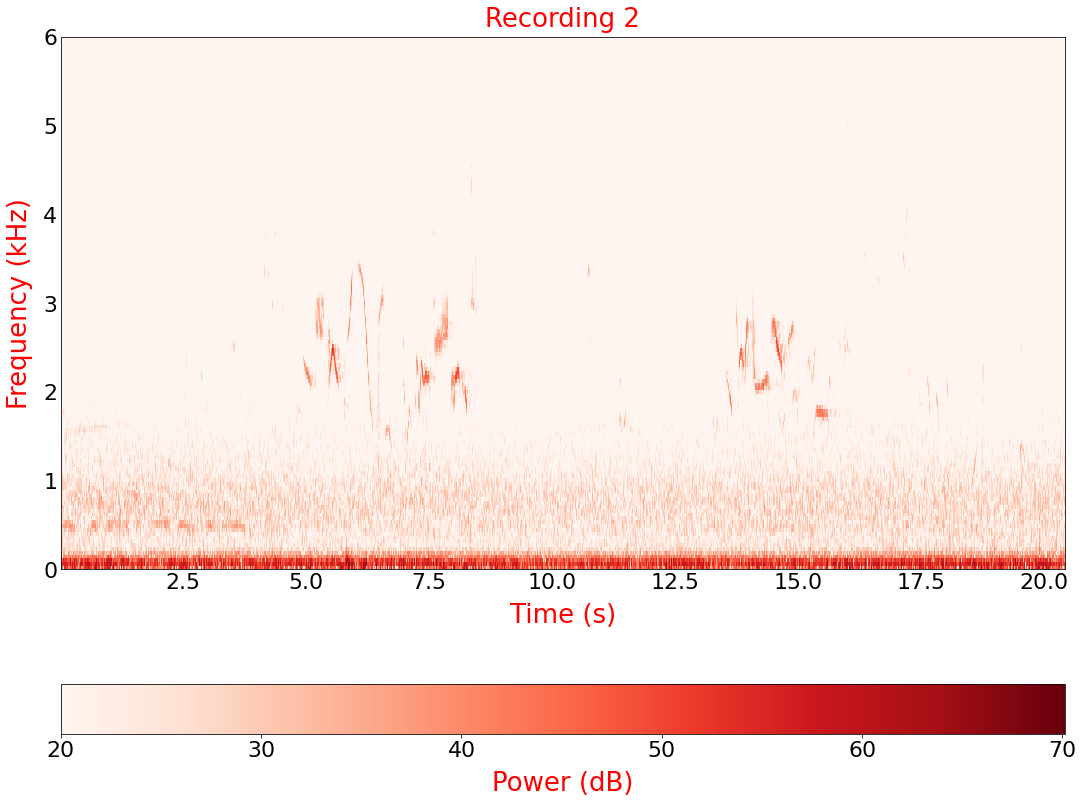

In [4]:
rate, audio = wavfile.read('recording2.wav')

N = audio.shape[0]            
L = N / rate                  
print(f'Audio length: {L:.2f} seconds')

freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')
spec_db_sp = 10*np.log10(spec_sp)

def plot_spec_scipy():
    fig, ax = plt.subplots(figsize=(18,14))
    im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Reds, linewidth=10)
    cb = fig.colorbar(im, ax=ax, orientation="horizontal")
    ax.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10, color='red')
    ax.set_xlabel('Time (s)', fontsize=26, labelpad=10, color='red');
    ax.set_title('Recording 2', fontsize=26, pad=10, color='red');
    ax.set_ylim(0, 6)
    ax.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb.set_label('Power (dB)', fontsize=26, labelpad=10, color='red')
    cb.ax.tick_params(labelsize=22)

plot_spec_scipy();

The first birdsong on this spectrogram belongs to the Cuckoo or Eurasian Collared-dove and can be seen at the very beginning of the spectrogram. The time span ranges between 0 and 3.5s and the frequency is very low at around 0.5kHz. It is barely visible but if you look closely there is an almost dotted line that has a darker shade of red around that area. The Cuckoo's song was more of a background sound as the bird was singing far away. The second and most distinct bird song on the spectrogram belongs to the Oriole which lasts around 2.5s and has a frequency range from 1.5kHz to 4.5kHz. The last bird that features on this spectrogram is the Grosbeak and only makes one quite call in the entirety of the recording. Its call can be seen at 11.35s and at a frequency of 1.5kHz. The Grosbeak was also a fair distance away and makes quite a strange call. The birdsongs and calls in this recording have quite low frequencies compared to the first recording.

# Third Recording
The third and final recording was recorded outside the student accommodation I live in. This time the Merlin sound ID analyser suggested five birds that are likely making the sounds in the recording. After close analysis I decided that two of the five birds suggested were not in fact making the sounds that they were supposed to. The three birds that feature in the recording after close analysis are the Song Sparrow, the Lesser Goldfinch and the Grace's Warbler. This recording is the longest of the three and lasts just shy of two minutes. The Warbler plays the smallest part in the recording followed by the Sparrow and the Goldfinch sings for the vast majority of the recording. All the birds have very distinct songs and are easily distinguished on the spectrogram. The colour theme for this spectrogram is grey as all three birds have grey accents on their feathers. The segment and overlap length stays the same as the last recording. I have changed the max frequency scale to 10 kHz.
<div>
<audio controls src='recording3.wav'/>
</div>

Audio length: 110.32 seconds


<ipython-input-6-0002f80e1356>:10: RuntimeWarning: divide by zero encountered in log10
  spec_db_sp = 10*np.log10(spec_sp)
<ipython-input-6-0002f80e1356>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Greys, linewidth=10)


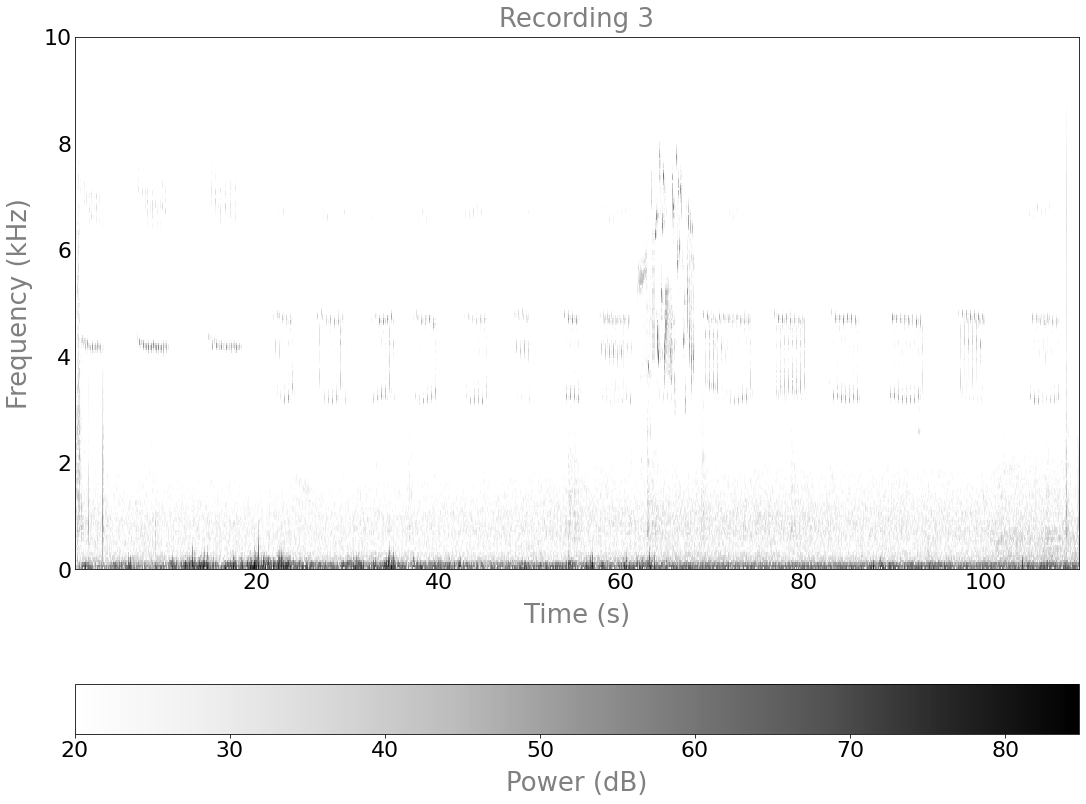

In [6]:
rate, audio = wavfile.read('recording3.wav')

N = audio.shape[0]            
L = N / rate                  
print(f'Audio length: {L:.2f} seconds')

freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')
spec_db_sp = 10*np.log10(spec_sp)

def plot_spec_scipy():
    fig, ax = plt.subplots(figsize=(18,14))
    im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=20, cmap=plt.cm.Greys, linewidth=10)
    cb = fig.colorbar(im, ax=ax, orientation="horizontal")
    ax.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10, color='grey')
    ax.set_xlabel('Time (s)', fontsize=26, labelpad=10, color='grey');
    ax.set_title('Recording 3', fontsize=26, pad=10, color='grey');
    ax.set_ylim(0, 10)
    ax.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb.set_label('Power (dB)', fontsize=26, labelpad=10, color='grey')
    cb.ax.tick_params(labelsize=22)

plot_spec_scipy();

The first birdsong on this spectrogram belongs to the Song Sparrow and can be clearly seen from the 0s to 20s mark. It has both a lower and higher frequency range and the song is very repetitive. If I had to compare it to another sound, I would say it sounds like a squeaky bicycle wheel that needs some oil. The second and majority birdsong on the spectrogram belongs to the Goldfinch. The Goldfinch also has a very repetitive song and a lower and higher frequency range. Its song lasts about five seconds for each burst and it also has a quite distinct sound when listening to it. The Warbler's song only lasts for a few seconds and can be seen in the cluster of sounds at around the 67s mark. The Warbler flew in, sang its song and flew away again which caused a mishmash of sounds in a short space of time. The distortion that is seen at the beginning and end of the spectrogram is caused by me fiddling with my phone. While this recording was quite long it definitely was the best as it has a range of distinct birdsongs and all of them can be easily distinguished on the spectrogram.

# Conclusion
In this report I analysed the birdsongs through spectrograms, that I recorded around my local area.
I believe that the topics that have been covered in this report will prove vital in the upcoming assignments and exams that are in this module. Moreover, I have a better understanding of the mathematical equations we do in labs. I am now able to put a name to the birds that live around my local area when I hear them singing. I developed more knowledge around Fourier transforms and the importance of them within our daily lives and how spectrograms are a fantastic tool to visualize audio.

To finish off this report I must say I enjoyed doing this assignment, I can't say the same thing for the majority of my assignments but for this one I truly mean it.

# References
[1] Xeno-canto. [Online]. Available: https://xeno-canto.org/. Accessed: Feb 28th, 2022.

[2] Merlin. [Online]. Available: https://merlin.allaboutbirds.org/. Accessed: Feb 28th, 2022.

[3] "What is a birdsong" [Online]. Available: https://www.google.com/search?q=what+is+a+birdsong&oq=what+is+a+birdsong&aqs=chrome..69i57j0i10i22i30j0i22i30l4j0i390j69i60.5886j1j4&sourceid=chrome&ie=UTF-8. Accessed: March 5th, 2022.

[4]"Spectrogram". [Online]. Wikipedia. Available: https://en.wikipedia.org/wiki/Spectrogram. Accessed: March 5th, 2022.

[5]"Spyder". [Online]. Available: https://www.spyder-ide.org/. Accessed: March 10th, 2022.

[6]"Anaconda". [Online]. Available: https://www.anaconda.com/. Accessed: March 10th, 2022.

[7]"Short-time Fourier transform".  [Online]. Wikipedia. Available: https://en.wikipedia.org/wiki/Short-time_Fourier_transform. Accessed: March 19th, 2022.

[8]"HTML maths equation Tutorial".  [Online]. Overleaf. Available: https://www.overleaf.com/learn/latex/Mathematical_expressions. Accessed: March 19th, 2022.